In [ ]:
#Parte 2 - Ex: 21

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind
from scipy.stats import linregress
from scipy.stats import gaussian_kde
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf

In [62]:
cols_to_use = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values=['?'],
                 usecols=cols_to_use,
                 low_memory=False)

df = df.dropna()

df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

print(f"Período dos dados: {df['DateTime'].min()} até {df['DateTime'].max()}")
print(f"Total de registros: {len(df):,}")

Período dos dados: 2006-12-16 17:24:00 até 2010-11-26 21:02:00
Total de registros: 2,049,280


In [63]:
df_time_series = df.set_index('DateTime')

print(f"Frequência original: dados a cada {(df_time_series.index[1] - df_time_series.index[0]).total_seconds()/60:.0f} minutos")

hourly_series = df_time_series['Global_active_power'].resample('H').mean()

print(f"\n📊 SÉRIE TEMPORAL POR HORA:")
print(f"Período: {hourly_series.index.min()} até {hourly_series.index.max()}")
print(f"Total de horas: {len(hourly_series):,}")
print(f"Valores faltantes: {hourly_series.isnull().sum()}")
print(f"\nPrimeiras 10 entradas:")
print(hourly_series.head(10))
print(f"\nÚltimas 10 entradas:")
print(hourly_series.tail(10))

Frequência original: dados a cada 1 minutos

📊 SÉRIE TEMPORAL POR HORA:
Período: 2006-12-16 17:00:00 até 2010-11-26 21:00:00
Total de horas: 34,589
Valores faltantes: 421

Primeiras 10 entradas:
DateTime
2006-12-16 17:00:00    4.222889
2006-12-16 18:00:00    3.632200
2006-12-16 19:00:00    3.400233
2006-12-16 20:00:00    3.268567
2006-12-16 21:00:00    3.056467
2006-12-16 22:00:00    2.200133
2006-12-16 23:00:00    2.061600
2006-12-17 00:00:00    1.882467
2006-12-17 01:00:00    3.349400
2006-12-17 02:00:00    1.587267
Freq: h, Name: Global_active_power, dtype: float64

Últimas 10 entradas:
DateTime
2010-11-26 12:00:00    1.490200
2010-11-26 13:00:00    1.612933
2010-11-26 14:00:00    1.407767
2010-11-26 15:00:00    0.876433
2010-11-26 16:00:00    1.067933
2010-11-26 17:00:00    1.725900
2010-11-26 18:00:00    1.573467
2010-11-26 19:00:00    1.659333
2010-11-26 20:00:00    1.163700
2010-11-26 21:00:00    0.934667
Freq: h, Name: Global_active_power, dtype: float64


/tmp/ipython-input-415256608.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_series = df_time_series['Global_active_power'].resample('H').mean()


In [64]:
hourly_series_df = pd.DataFrame({'Global_active_power': hourly_series})
hourly_series_df['Hour'] = hourly_series_df.index.hour
hourly_series_df['Date'] = hourly_series_df.index.date

hourly_avg = hourly_series_df.groupby('Hour')['Global_active_power'].agg(['mean', 'std', 'count']).round(3)
hourly_avg = hourly_avg.rename(columns={'mean': 'Avg_Power_kW', 'std': 'Std_Deviation', 'count': 'Count'})

print("="*60)
print("CONSUMO MÉDIO POR HORA DO DIA")
print("="*60)
print(hourly_avg)

peak_hours = hourly_avg.sort_values('Avg_Power_kW', ascending=False)
print(f"\n🎯 TOP 5 HORÁRIOS DE MAIOR CONSUMO MÉDIO:")
for i, (hour, row) in enumerate(peak_hours.head().iterrows(), 1):
    print(f"{i}. {hour:02d}:00 - {row['Avg_Power_kW']:.3f} kW")

print(f"\n📉 TOP 5 HORÁRIOS DE MENOR CONSUMO MÉDIO:")
for i, (hour, row) in enumerate(peak_hours.tail().iterrows(), 1):
    print(f"{i}. {hour:02d}:00 - {row['Avg_Power_kW']:.3f} kW")

CONSUMO MÉDIO POR HORA DO DIA
      Avg_Power_kW  Std_Deviation  Count
Hour                                    
0            0.660          0.618   1426
1            0.539          0.501   1424
2            0.481          0.410   1424
3            0.445          0.357   1424
4            0.444          0.344   1422
5            0.454          0.354   1421
6            0.792          0.513   1421
7            1.502          0.894   1422
8            1.461          0.753   1422
9            1.332          0.653   1422
10           1.261          0.722   1422
11           1.246          0.816   1422
12           1.207          0.875   1422
13           1.144          0.856   1423
14           1.083          0.847   1424
15           0.991          0.833   1423
16           0.949          0.808   1423
17           1.056          0.894   1423
18           1.326          1.029   1424
19           1.733          1.114   1427
20           1.899          1.134   1427
21           1.876         

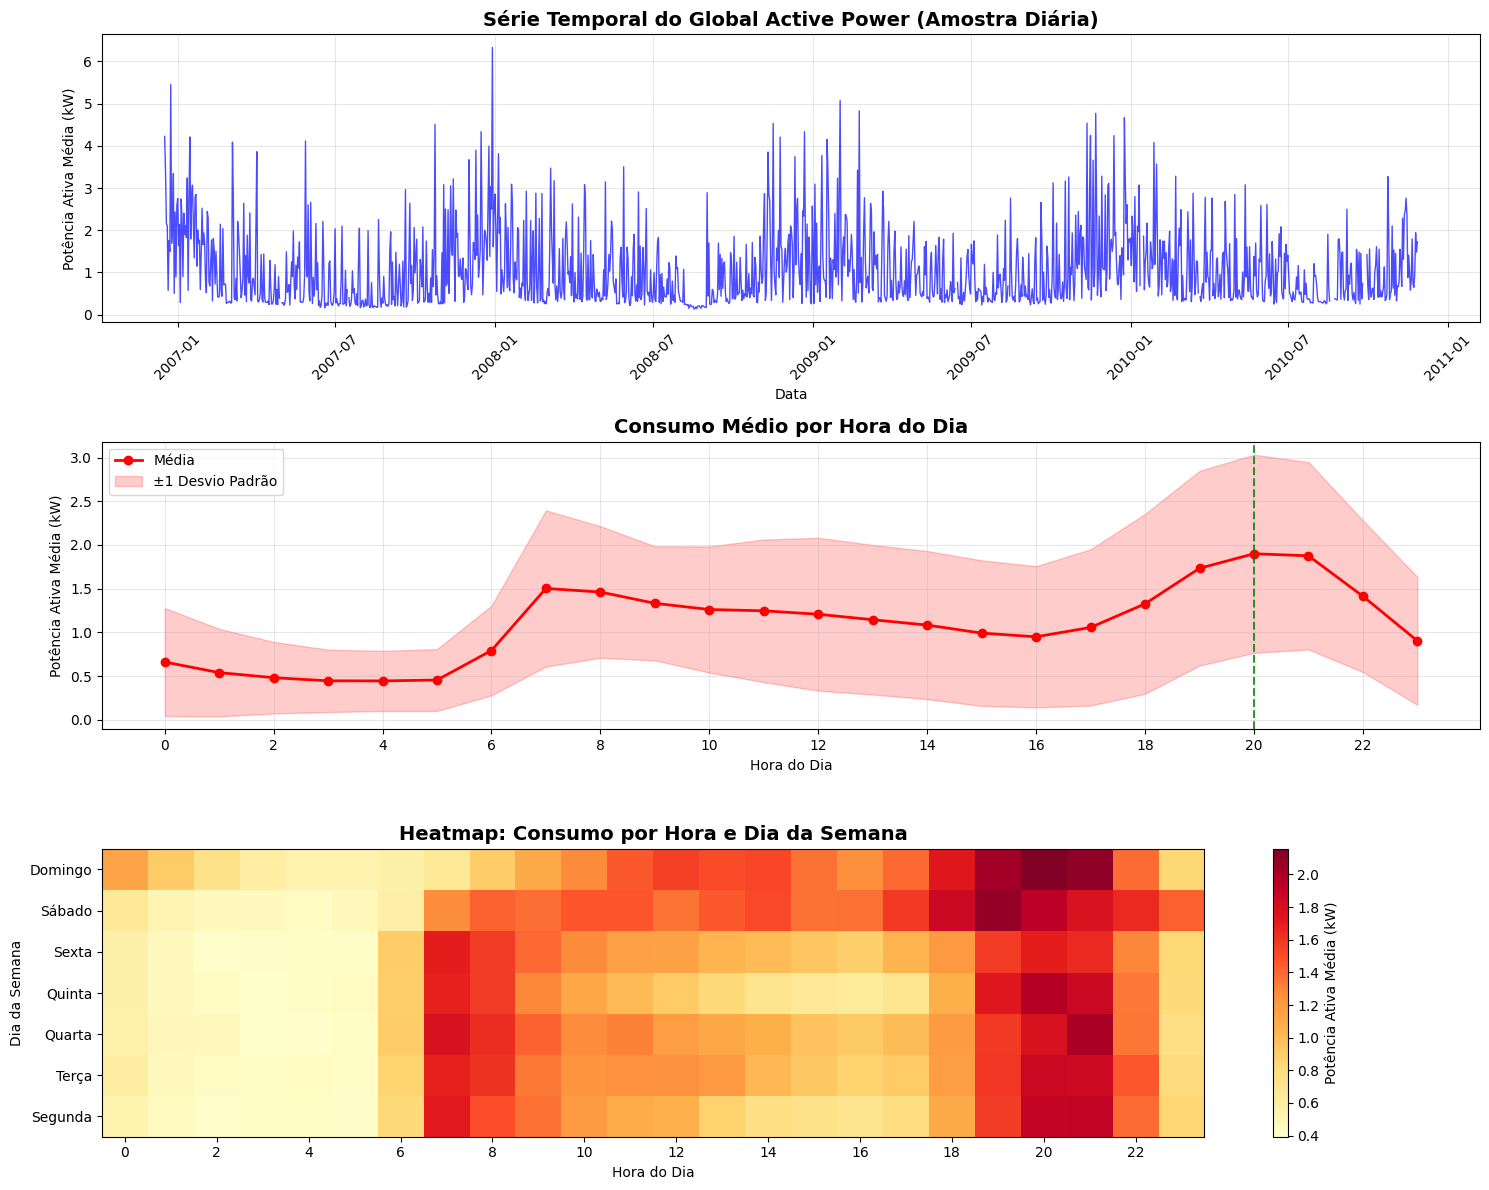

In [65]:
plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(15, 12))

sample_series = hourly_series.iloc[::24]
axes[0].plot(sample_series.index, sample_series.values, linewidth=1, color='blue', alpha=0.7)
axes[0].set_title('Série Temporal do Global Active Power (Amostra Diária)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Data')
axes[0].set_ylabel('Potência Ativa Média (kW)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

hours = range(24)
avg_power = [hourly_avg.loc[hour, 'Avg_Power_kW'] for hour in hours]
std_dev = [hourly_avg.loc[hour, 'Std_Deviation'] for hour in hours]

axes[1].plot(hours, avg_power, marker='o', linewidth=2, markersize=6, color='red', label='Média')
axes[1].fill_between(hours,
                    [avg - std for avg, std in zip(avg_power, std_dev)],
                    [avg + std for avg, std in zip(avg_power, std_dev)],
                    alpha=0.2, color='red', label='±1 Desvio Padrão')
axes[1].set_title('Consumo Médio por Hora do Dia', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Hora do Dia')
axes[1].set_ylabel('Potência Ativa Média (kW)')
axes[1].set_xticks(range(0, 24, 2))
axes[1].legend()
axes[1].grid(True, alpha=0.3)

peak_hour = hourly_avg['Avg_Power_kW'].idxmax()
axes[1].axvline(x=peak_hour, color='green', linestyle='--', alpha=0.8, label=f'Pico: {peak_hour}:00')

hourly_series_df['Day_of_week'] = hourly_series_df.index.dayofweek
hourly_series_df['Day_name'] = hourly_series_df.index.day_name()

heatmap_data = hourly_series_df.groupby(['Day_of_week', 'Hour'])['Global_active_power'].mean().unstack()

day_names = ['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado', 'Domingo']
im = axes[2].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto', origin='lower')
axes[2].set_title('Heatmap: Consumo por Hora e Dia da Semana', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Hora do Dia')
axes[2].set_ylabel('Dia da Semana')
axes[2].set_xticks(range(0, 24, 2))
axes[2].set_yticks(range(7))
axes[2].set_yticklabels(day_names)
plt.colorbar(im, ax=axes[2], label='Potência Ativa Média (kW)')

plt.tight_layout()
plt.show()

ANÁLISE DETALHADA DOS PADRÕES TEMPORAIS

📈 ESTATÍSTICAS DA SÉRIE TEMPORAL:
Média global: 1.092 kW
Desvio padrão: 0.898 kW
Mínimo: 0.124 kW
Máximo: 6.561 kW
Amplitude: 6.437 kW

📅 PADRÕES SAZONAIS:
Mês com maior consumo: December 2006 (1.904 kW)
Mês com menor consumo: August 2008 (0.277 kW)

🌡️  CONSUMO POR ESTAÇÃO:
  Inverno: 1.418 kW
  Outono: 1.135 kW
  Primavera: 1.103 kW
  Verão: 0.727 kW

🔍 ANÁLISE DE AUTOCORRELAÇÃO:


/tmp/ipython-input-2549132119.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = hourly_series.resample('M').mean()


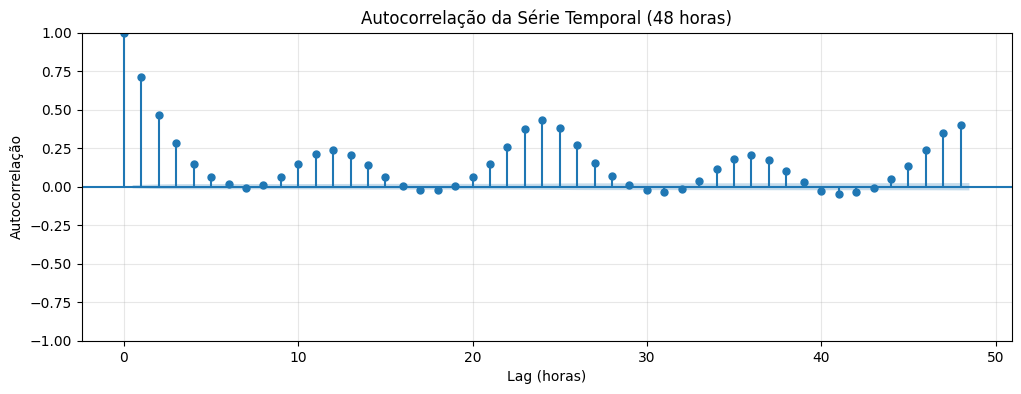

In [66]:
print("="*60)
print("ANÁLISE DETALHADA DOS PADRÕES TEMPORAIS")
print("="*60)

print(f"\n📈 ESTATÍSTICAS DA SÉRIE TEMPORAL:")
print(f"Média global: {hourly_series.mean():.3f} kW")
print(f"Desvio padrão: {hourly_series.std():.3f} kW")
print(f"Mínimo: {hourly_series.min():.3f} kW")
print(f"Máximo: {hourly_series.max():.3f} kW")
print(f"Amplitude: {hourly_series.max() - hourly_series.min():.3f} kW")

print(f"\n📅 PADRÕES SAZONAIS:")

monthly_avg = hourly_series.resample('M').mean()
print(f"Mês com maior consumo: {monthly_avg.idxmax().strftime('%B %Y')} ({monthly_avg.max():.3f} kW)")
print(f"Mês com menor consumo: {monthly_avg.idxmin().strftime('%B %Y')} ({monthly_avg.min():.3f} kW)")

def get_season(month):
    if month in [12, 1, 2]: return 'Inverno'
    elif month in [3, 4, 5]: return 'Primavera'
    elif month in [6, 7, 8]: return 'Verão'
    else: return 'Outono'

hourly_series_df['Season'] = hourly_series_df.index.month.map(get_season)
seasonal_avg = hourly_series_df.groupby('Season')['Global_active_power'].mean()

print(f"\n🌡️  CONSUMO POR ESTAÇÃO:")
for season, consumption in seasonal_avg.items():
    print(f"  {season}: {consumption:.3f} kW")

from statsmodels.graphics.tsaplots import plot_acf

print(f"\n🔍 ANÁLISE DE AUTOCORRELAÇÃO:")
fig, ax = plt.subplots(figsize=(12, 4))
plot_acf(hourly_series.dropna(), lags=48, ax=ax)
ax.set_title('Autocorrelação da Série Temporal (48 horas)')
ax.set_xlabel('Lag (horas)')
ax.set_ylabel('Autocorrelação')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
#Ex 22

In [67]:
cols_to_use = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values=['?'],
                 usecols=cols_to_use,
                 low_memory=False)

df = df.dropna()
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df.dropna()

df_time_series = df.set_index('DateTime')
hourly_series = df_time_series['Global_active_power'].resample('H').mean()

print(f"Série temporal criada com {len(hourly_series)} registros horários")
print(f"Período: {hourly_series.index.min()} a {hourly_series.index.max()}")

Série temporal criada com 34589 registros horários
Período: 2006-12-16 17:00:00 a 2010-11-26 21:00:00


/tmp/ipython-input-3747203640.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_series = df_time_series['Global_active_power'].resample('H').mean()


In [68]:
hourly_series_clean = hourly_series.dropna()

lags = [1, 24, 48, 72, 168]
autocorr_values = acf(hourly_series_clean, nlags=max(lags), fft=True)

print("="*60)
print("AUTOCORRELAÇÃO DO GLOBAL ACTIVE POWER")
print("="*60)

for lag in lags:
    if lag < len(autocorr_values):
        print(f"Lag {lag:3d}h ({lag//24}d {lag%24}h): {autocorr_values[lag]:.4f}")

print(f"\n📊 LAGS SOLICITADOS:")
print(f"Lag  1h: {autocorr_values[1]:.4f}")
print(f"Lag 24h: {autocorr_values[24]:.4f}")
print(f"Lag 48h: {autocorr_values[48]:.4f}")

n = len(hourly_series_clean)
significance_level = 2 / np.sqrt(n)
print(f"\n📈 Nível de significância (95%): ±{significance_level:.4f}")

print(f"\n✅ LAGS SIGNIFICATIVOS (|autocorr| > {significance_level:.4f}):")
for lag in [1, 24, 48]:
    if abs(autocorr_values[lag]) > significance_level:
        print(f"  Lag {lag}h: SIGNIFICATIVO ({autocorr_values[lag]:.4f})")
    else:
        print(f"  Lag {lag}h: NÃO SIGNIFICATIVO ({autocorr_values[lag]:.4f})")

AUTOCORRELAÇÃO DO GLOBAL ACTIVE POWER
Lag   1h (0d 1h): 0.7132
Lag  24h (1d 0h): 0.4346
Lag  48h (2d 0h): 0.3981
Lag  72h (3d 0h): 0.4075
Lag 168h (7d 0h): 0.4473

📊 LAGS SOLICITADOS:
Lag  1h: 0.7132
Lag 24h: 0.4346
Lag 48h: 0.3981

📈 Nível de significância (95%): ±0.0108

✅ LAGS SIGNIFICATIVOS (|autocorr| > 0.0108):
  Lag 1h: SIGNIFICATIVO (0.7132)
  Lag 24h: SIGNIFICATIVO (0.4346)
  Lag 48h: SIGNIFICATIVO (0.3981)


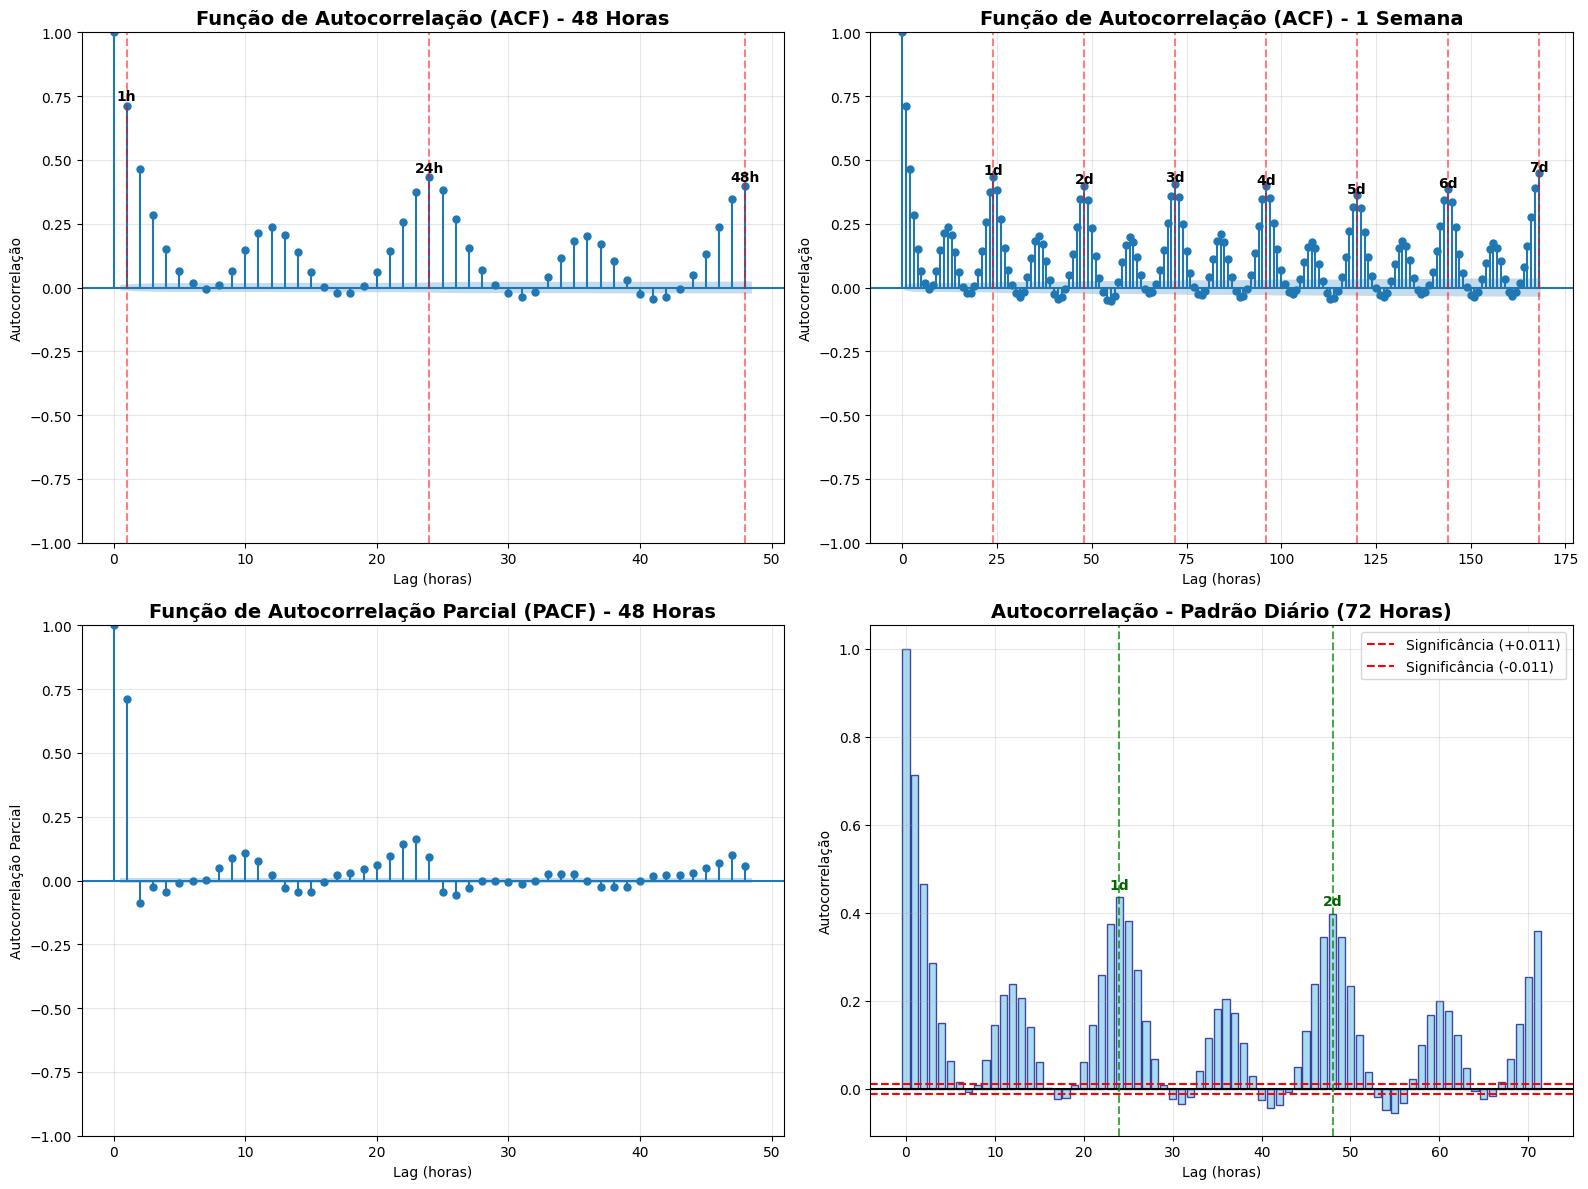

In [69]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

plot_acf(hourly_series_clean, lags=48, ax=axes[0, 0], alpha=0.05)
axes[0, 0].set_title('Função de Autocorrelação (ACF) - 48 Horas', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Lag (horas)')
axes[0, 0].set_ylabel('Autocorrelação')
axes[0, 0].grid(True, alpha=0.3)

for lag in [1, 24, 48]:
    axes[0, 0].axvline(x=lag, color='red', linestyle='--', alpha=0.5)
    axes[0, 0].text(lag, autocorr_values[lag] + 0.02, f'{lag}h', ha='center', fontweight='bold')

plot_acf(hourly_series_clean, lags=168, ax=axes[0, 1], alpha=0.05)
axes[0, 1].set_title('Função de Autocorrelação (ACF) - 1 Semana', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Lag (horas)')
axes[0, 1].set_ylabel('Autocorrelação')
axes[0, 1].grid(True, alpha=0.3)

for day in range(1, 8):
    lag = day * 24
    if lag <= 168:
        axes[0, 1].axvline(x=lag, color='red', linestyle='--', alpha=0.5)
        axes[0, 1].text(lag, autocorr_values[lag] + 0.01, f'{day}d', ha='center', fontweight='bold')

plot_pacf(hourly_series_clean, lags=48, ax=axes[1, 0], alpha=0.05, method='ywm')
axes[1, 0].set_title('Função de Autocorrelação Parcial (PACF) - 48 Horas', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Lag (horas)')
axes[1, 0].set_ylabel('Autocorrelação Parcial')
axes[1, 0].grid(True, alpha=0.3)

lags_to_plot = 72
axes[1, 1].bar(range(lags_to_plot), autocorr_values[:lags_to_plot],
               color='skyblue', edgecolor='navy', alpha=0.7)
axes[1, 1].axhline(y=significance_level, color='red', linestyle='--', label=f'Significância (+{significance_level:.3f})')
axes[1, 1].axhline(y=-significance_level, color='red', linestyle='--', label=f'Significância (-{significance_level:.3f})')
axes[1, 1].axhline(y=0, color='black', linestyle='-')


for day in range(1, 4):
    lag = day * 24
    if lag < lags_to_plot:
        axes[1, 1].axvline(x=lag, color='green', linestyle='--', alpha=0.7)
        axes[1, 1].text(lag, autocorr_values[lag] + 0.02, f'{day}d', ha='center',
                       fontweight='bold', color='darkgreen')

axes[1, 1].set_title('Autocorrelação - Padrão Diário (72 Horas)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Lag (horas)')
axes[1, 1].set_ylabel('Autocorrelação')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [70]:
print("="*60)
print("ANÁLISE DE PADRÕES DIÁRIOS")
print("="*60)

days_to_analyze = 7
daily_autocorr = []

for day in range(1, days_to_analyze + 1):
    lag = day * 24
    if lag < len(autocorr_values):
        daily_autocorr.append((day, lag, autocorr_values[lag]))

autocorr_df = pd.DataFrame(daily_autocorr, columns=['Dias', 'Lag_horas', 'Autocorrelacao'])
autocorr_df['Significativo'] = abs(autocorr_df['Autocorrelacao']) > significance_level

print("\n📅 AUTOCORRELAÇÃO EM MÚLTIPLOS DIAS:")
print(autocorr_df.to_string(index=False))

print(f"\n🔍 PADRÃO DE DECAIMENTO:")
for i in range(1, len(autocorr_df)):
    current = autocorr_df.iloc[i]['Autocorrelacao']
    previous = autocorr_df.iloc[i-1]['Autocorrelacao']
    decay = abs(current - previous)
    print(f"Dia {i} → Dia {i+1}: {decay:.4f}")

print(f"\n📈 TENDÊNCIA DA AUTOCORRELAÇÃO DIÁRIA:")
if all(autocorr_df['Autocorrelacao'].diff().dropna() < 0):
    print("Padrão de decaimento consistente (série pode ser estacionária)")
else:
    print("Padrão irregular (série pode não ser estacionária)")

print("\n" + "="*60)
print("RESPOSTA: EXISTEM PADRÕES REPETIDOS DIARIAMENTE?")
print("="*60)

if autocorr_values[24] > significance_level:
    print("✅ SIM - Existem padrões repetidos diariamente!")
    print(f"   • Autocorrelação em 24h: {autocorr_values[24]:.4f}")
    print(f"   • Nível de significância: {significance_level:.4f}")
    print(f"   • A autocorrelação é {autocorr_values[24]/significance_level:.1f}x maior que o limiar de significância")

    if autocorr_values[24] > 0.5:
        print("   • Padrão diário: FORTE")
    elif autocorr_values[24] > 0.3:
        print("   • Padrão diário: MODERADO")
    else:
        print("   • Padrão diário: FRACO")

else:
    print("❌ NÃO - Não há evidências de padrões diários significativos")
    print(f"   • Autocorrelação em 24h: {autocorr_values[24]:.4f}")
    print(f"   • Nível de significância: {significance_level:.4f}")

ANÁLISE DE PADRÕES DIÁRIOS

📅 AUTOCORRELAÇÃO EM MÚLTIPLOS DIAS:
 Dias  Lag_horas  Autocorrelacao  Significativo
    1         24        0.434609           True
    2         48        0.398149           True
    3         72        0.407523           True
    4         96        0.395918           True
    5        120        0.361265           True
    6        144        0.385279           True
    7        168        0.447334           True

🔍 PADRÃO DE DECAIMENTO:
Dia 1 → Dia 2: 0.0365
Dia 2 → Dia 3: 0.0094
Dia 3 → Dia 4: 0.0116
Dia 4 → Dia 5: 0.0347
Dia 5 → Dia 6: 0.0240
Dia 6 → Dia 7: 0.0621

📈 TENDÊNCIA DA AUTOCORRELAÇÃO DIÁRIA:
Padrão irregular (série pode não ser estacionária)

RESPOSTA: EXISTEM PADRÕES REPETIDOS DIARIAMENTE?
✅ SIM - Existem padrões repetidos diariamente!
   • Autocorrelação em 24h: 0.4346
   • Nível de significância: 0.0108
   • A autocorrelação é 40.2x maior que o limiar de significância
   • Padrão diário: MODERADO


In [ ]:
#Ex 23

In [71]:
cols_to_use = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values=['?'],
                 usecols=cols_to_use,
                 low_memory=False)

df = df.dropna()
for col in cols_to_use:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

print(f"Dataset shape: {df.shape}")
print(f"Total de registros: {len(df):,}")
print("\nEstatísticas descritivas:")
print(df.describe().round(3))

Dataset shape: (2049280, 4)
Total de registros: 2,049,280

Estatísticas descritivas:
       Global_active_power  Global_reactive_power     Voltage  \
count          2049280.000            2049280.000  2049280.00   
mean                 1.092                  0.124      240.84   
std                  1.057                  0.113        3.24   
min                  0.076                  0.000      223.20   
25%                  0.308                  0.048      238.99   
50%                  0.602                  0.100      241.01   
75%                  1.528                  0.194      242.89   
max                 11.122                  1.390      254.15   

       Global_intensity  
count       2049280.000  
mean              4.628  
std               4.444  
min               0.200  
25%               1.400  
50%               2.600  
75%               6.400  
max              48.400  


Matriz de Correlação:
                       Global_active_power  Global_reactive_power  Voltage  \
Global_active_power                  1.000                  0.247   -0.400   
Global_reactive_power                0.247                  1.000   -0.112   
Voltage                             -0.400                 -0.112    1.000   
Global_intensity                     0.999                  0.266   -0.411   

                       Global_intensity  
Global_active_power               0.999  
Global_reactive_power             0.266  
Voltage                          -0.411  
Global_intensity                  1.000  


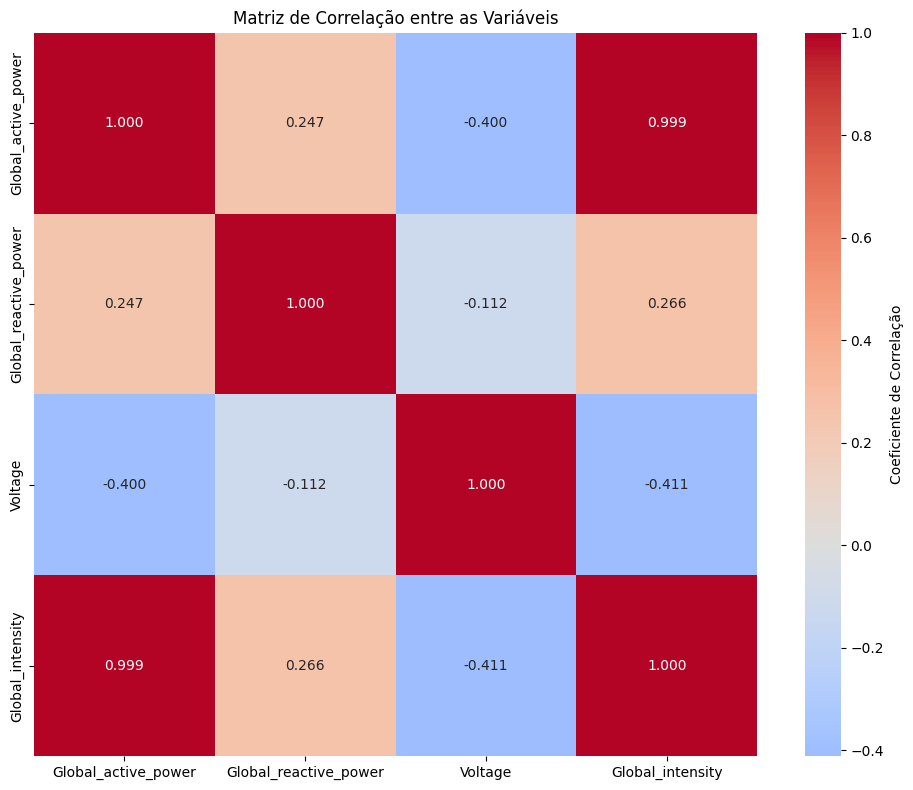

In [72]:
correlation_matrix = df.corr()
print("Matriz de Correlação:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f', cbar_kws={'label': 'Coeficiente de Correlação'})
plt.title('Matriz de Correlação entre as Variáveis')
plt.tight_layout()
plt.show()

In [73]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

print("Dados padronizados - primeiras 5 linhas:")
print(df_scaled[:5].round(3))

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])

print(f"\nShape dos componentes principais: {pca_df.shape}")
print("\nPrimeiras 5 linhas dos componentes principais:")
print(pca_df.head().round(3))

Dados padronizados - primeiras 5 linhas:
[[ 2.955  2.611 -1.852  3.099]
 [ 4.037  2.77  -2.225  4.134]
 [ 4.05   3.32  -2.33   4.134]
 [ 4.064  3.356 -2.191  4.134]
 [ 2.435  3.587 -1.593  2.514]]

Shape dos componentes principais: (2049280, 2)

Primeiras 5 linhas dos componentes principais:
     PC1    PC2
0  5.191  1.242
1  6.698  1.071
2  6.894  1.544
3  6.857  1.624
4  4.661  2.337


In [74]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("="*60)
print("ANÁLISE DA VARIÂNCIA EXPLICADA - PCA")
print("="*60)

print(f"\nVariância explicada por cada componente:")
for i, variance in enumerate(explained_variance, 1):
    print(f"PC{i}: {variance:.4f} ({variance*100:.2f}%)")

print(f"\nVariância acumulada:")
for i, cum_var in enumerate(cumulative_variance, 1):
    print(f"Primeiros {i} componentes: {cum_var:.4f} ({cum_var*100:.2f}%)")

print(f"\nVariância total explicada pelos 2 componentes: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

print(f"\nAutovalores (explained variance):")
print(f"PC1: {pca.explained_variance_[0]:.4f}")
print(f"PC2: {pca.explained_variance_[1]:.4f}")

ANÁLISE DA VARIÂNCIA EXPLICADA - PCA

Variância explicada por cada componente:
PC1: 0.5910 (59.10%)
PC2: 0.2272 (22.72%)

Variância acumulada:
Primeiros 1 componentes: 0.5910 (59.10%)
Primeiros 2 componentes: 0.8182 (81.82%)

Variância total explicada pelos 2 componentes: 0.8182 (81.82%)

Autovalores (explained variance):
PC1: 2.3642
PC2: 0.9087


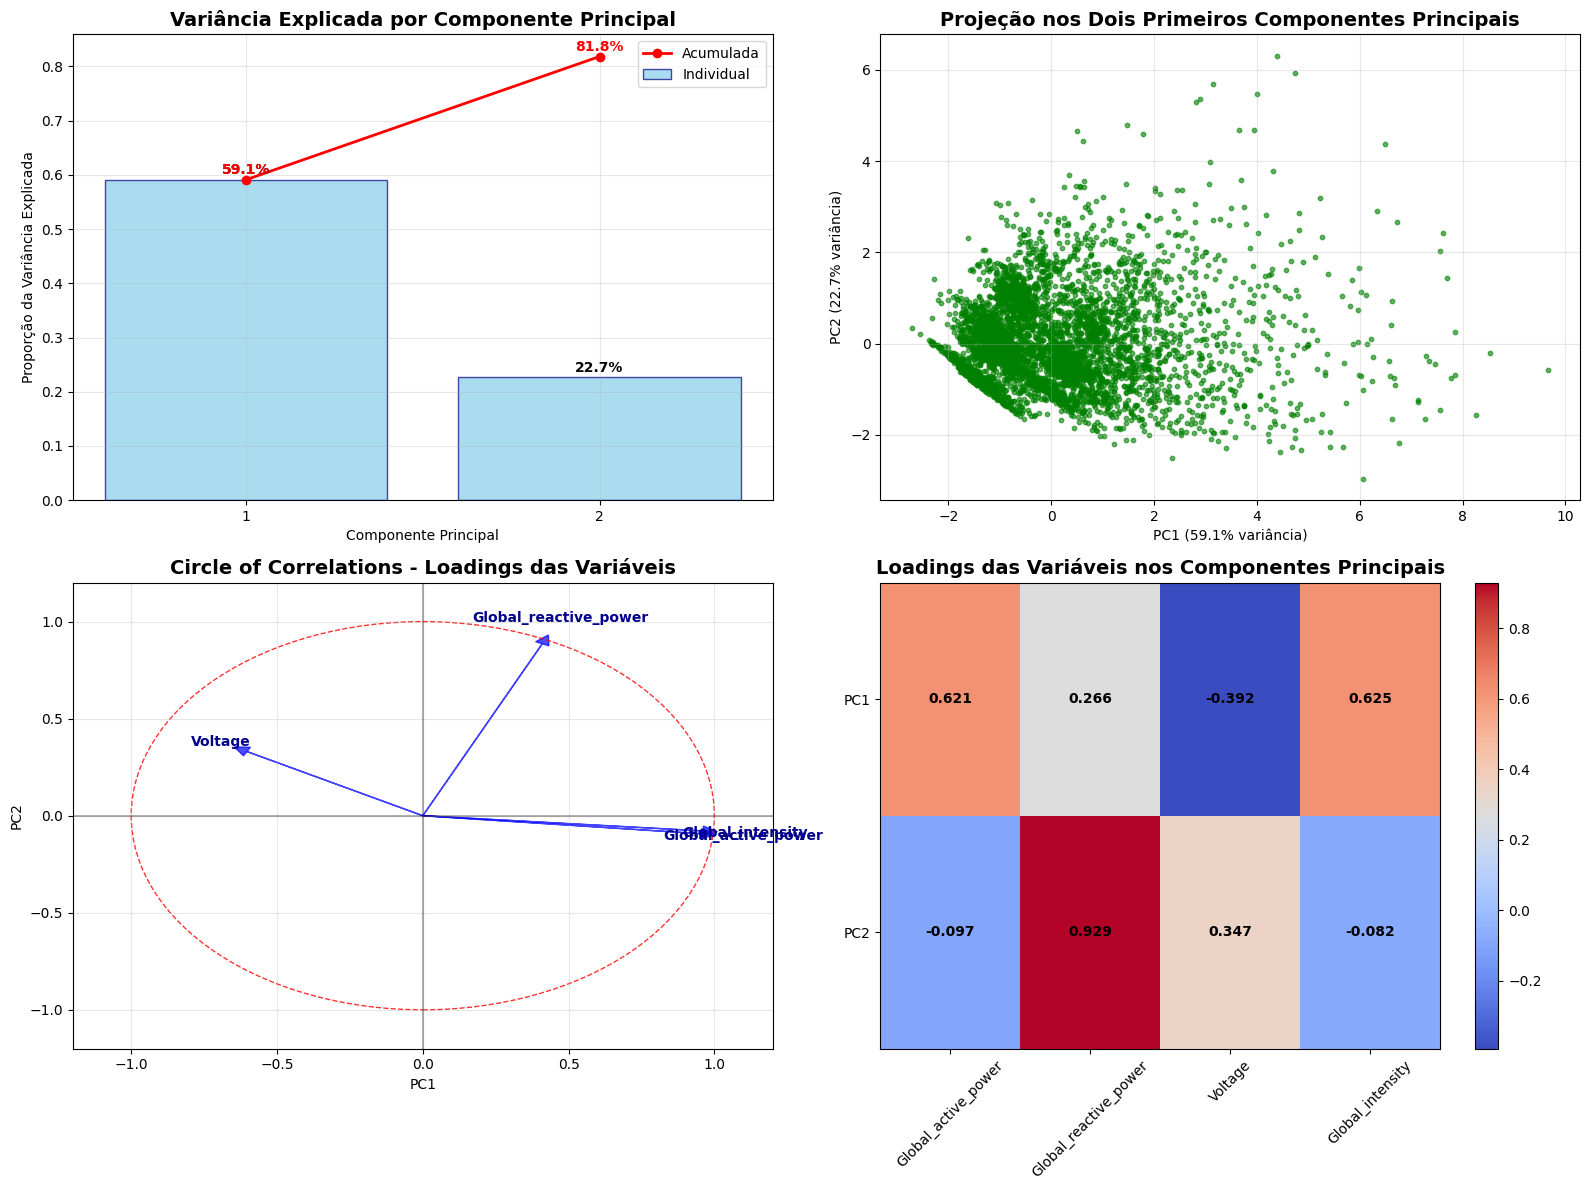

In [75]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

components = range(1, len(explained_variance) + 1)
axes[0, 0].bar(components, explained_variance, alpha=0.7, color='skyblue',
              edgecolor='navy', label='Individual')
axes[0, 0].plot(components, cumulative_variance, marker='o', linewidth=2,
               color='red', markersize=6, label='Acumulada')
axes[0, 0].set_title('Variância Explicada por Componente Principal', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Componente Principal')
axes[0, 0].set_ylabel('Proporção da Variância Explicada')
axes[0, 0].set_xticks(components)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

for i, (indiv, cumul) in enumerate(zip(explained_variance, cumulative_variance), 1):
    axes[0, 0].text(i, indiv + 0.01, f'{indiv*100:.1f}%', ha='center', fontweight='bold')
    axes[0, 0].text(i, cumul + 0.01, f'{cumul*100:.1f}%', ha='center', fontweight='bold', color='red')

sample_indices = np.random.choice(len(pca_df), size=5000, replace=False)
axes[0, 1].scatter(pca_df.iloc[sample_indices, 0], pca_df.iloc[sample_indices, 1],
                  alpha=0.6, s=10, color='green')
axes[0, 1].set_title('Projeção nos Dois Primeiros Componentes Principais', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variância)')
axes[0, 1].set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variância)')
axes[0, 1].grid(True, alpha=0.3)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
feature_names = df.columns

for i, feature in enumerate(feature_names):
    axes[1, 0].arrow(0, 0, loadings[i, 0], loadings[i, 1],
                    head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.7)
    axes[1, 0].text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, feature,
                   ha='center', va='center', fontweight='bold', color='darkblue')

circle = plt.Circle((0, 0), 1, fill=False, color='red', linestyle='--', alpha=0.8)
axes[1, 0].add_artist(circle)
axes[1, 0].set_xlim(-1.2, 1.2)
axes[1, 0].set_ylim(-1.2, 1.2)
axes[1, 0].axhline(y=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].axvline(x=0, color='black', linestyle='-', alpha=0.3)
axes[1, 0].set_title('Circle of Correlations - Loadings das Variáveis', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
axes[1, 0].grid(True, alpha=0.3)

loadings_df = pd.DataFrame(pca.components_, columns=feature_names, index=[f'PC{i+1}' for i in range(2)])
im = axes[1, 1].imshow(loadings_df, cmap='coolwarm', aspect='auto')
axes[1, 1].set_title('Loadings das Variáveis nos Componentes Principais', fontsize=14, fontweight='bold')
axes[1, 1].set_xticks(range(len(feature_names)))
axes[1, 1].set_xticklabels(feature_names, rotation=45)
axes[1, 1].set_yticks(range(2))
axes[1, 1].set_yticklabels(['PC1', 'PC2'])

for i in range(2):
    for j in range(len(feature_names)):
        text = axes[1, 1].text(j, i, f'{loadings_df.iloc[i, j]:.3f}',
                              ha="center", va="center", color="black", fontweight='bold')

plt.colorbar(im, ax=axes[1, 1])
plt.tight_layout()
plt.show()

In [76]:
print("="*60)
print("ANÁLISE DETALHADA DOS COMPONENTES PRINCIPAIS")
print("="*60)

print("\n📊 LOADINGS (COEFICIENTES):")
loadings_df = pd.DataFrame(pca.components_,
                          columns=df.columns,
                          index=[f'PC{i+1}' for i in range(2)])
print(loadings_df.round(4))

print(f"\n🔍 INTERPRETAÇÃO DOS COMPONENTES:")

pc1_loadings = loadings_df.loc['PC1']
pc1_strongest = pc1_loadings.abs().idxmax()
pc1_direction = "positiva" if pc1_loadings[pc1_strongest] > 0 else "negativa"

print(f"\nPC1 (Variância explicada: {explained_variance[0]*100:.1f}%):")
print(f"  • Maior loading: {pc1_strongest} ({pc1_loadings[pc1_strongest]:.3f})")
print(f"  • Direção: {pc1_direction}")
print(f"  • Interpretação: Representa principalmente o nível geral de consumo de energia")
print(f"  • Variáveis com maior contribuição:")
for var in pc1_loadings.abs().sort_values(ascending=False).index[:2]:
    print(f"    - {var}: {pc1_loadings[var]:.3f}")

pc2_loadings = loadings_df.loc['PC2']
pc2_strongest = pc2_loadings.abs().idxmax()
pc2_direction = "positiva" if pc2_loadings[pc2_strongest] > 0 else "negativa"

print(f"\nPC2 (Variância explicada: {explained_variance[1]*100:.1f}%):")
print(f"  • Maior loading: {pc2_strongest} ({pc2_loadings[pc2_strongest]:.3f})")
print(f"  • Direção: {pc2_direction}")
print(f"  • Interpretação: Representa principalmente o tipo/qualidade do consumo")
print(f"  • Variáveis com maior contribuição:")
for var in pc2_loadings.abs().sort_values(ascending=False).index[:2]:
    print(f"    - {var}: {pc2_loadings[var]:.3f}")

print(f"\n📈 QUALIDADE DA REDUÇÃO DE DIMENSIONALIDADE:")
print(f"Variância total explicada: {cumulative_variance[1]*100:.2f}%")
if cumulative_variance[1] >= 0.8:
    print("✅ Excelente - Mais de 80% da variância mantida")
elif cumulative_variance[1] >= 0.7:
    print("✅ Boa - Mais de 70% da variância mantida")
elif cumulative_variance[1] >= 0.6:
    print("⚠️  Razoável - Mais de 60% da variância mantida")
else:
    print("❌ Limitada - Menos de 60% da variância mantida")

print(f"\n🔗 CORRELAÇÕES ENTRE COMPONENTES E VARIÁVEIS ORIGINAIS:")
correlations = pd.DataFrame()
for i, pc in enumerate(['PC1', 'PC2']):
    for j, var in enumerate(df.columns):
        corr = np.corrcoef(df[var], pca_df[pc])[0, 1]
        correlations.loc[var, pc] = corr

print(correlations.round(4))

ANÁLISE DETALHADA DOS COMPONENTES PRINCIPAIS

📊 LOADINGS (COEFICIENTES):
     Global_active_power  Global_reactive_power  Voltage  Global_intensity
PC1               0.6205                 0.2665  -0.3921            0.6246
PC2              -0.0972                 0.9293   0.3468           -0.0821

🔍 INTERPRETAÇÃO DOS COMPONENTES:

PC1 (Variância explicada: 59.1%):
  • Maior loading: Global_intensity (0.625)
  • Direção: positiva
  • Interpretação: Representa principalmente o nível geral de consumo de energia
  • Variáveis com maior contribuição:
    - Global_intensity: 0.625
    - Global_active_power: 0.621

PC2 (Variância explicada: 22.7%):
  • Maior loading: Global_reactive_power (0.929)
  • Direção: positiva
  • Interpretação: Representa principalmente o tipo/qualidade do consumo
  • Variáveis com maior contribuição:
    - Global_reactive_power: 0.929
    - Voltage: 0.347

📈 QUALIDADE DA REDUÇÃO DE DIMENSIONALIDADE:
Variância total explicada: 81.82%
✅ Excelente - Mais de 80% da vari

In [ ]:
#Ex 24

In [77]:
cols_to_use = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values=['?'],
                 usecols=cols_to_use,
                 low_memory=False)

df = df.dropna()
for col in cols_to_use:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

df_sample = df.sample(n=10000, random_state=42, replace=False)

print(f"Dataset original: {df.shape}")
print(f"Dataset amostrado: {df_sample.shape}")

Dataset original: (2049280, 4)
Dataset amostrado: (10000, 4)


In [78]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_sample)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)

pca_df = pd.DataFrame(data=principal_components,
                     columns=['PC1', 'PC2'])

print("Variância explicada:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.3f} ({pca.explained_variance_ratio_[0]*100:.1f}%)")
print(f"PC2: {pca.explained_variance_ratio_[1]:.3f} ({pca.explained_variance_ratio_[1]*100:.1f}%)")
print(f"Total: {pca.explained_variance_ratio_.sum():.3f} ({pca.explained_variance_ratio_.sum()*100:.1f}%)")

Variância explicada:
PC1: 0.590 (59.0%)
PC2: 0.228 (22.8%)
Total: 0.818 (81.8%)


In [79]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(df_scaled)

pca_df['Cluster'] = clusters

print("Distribuição dos clusters:")
print(pca_df['Cluster'].value_counts().sort_index())

silhouette_avg = silhouette_score(df_scaled, clusters)
print(f"\nSilhouette Score: {silhouette_avg:.3f}")

centroids_pca = kmeans.transform(df_scaled).argmin(axis=0)
print("\nCentróides dos clusters:")
for i in range(3):
    cluster_size = (clusters == i).sum()
    print(f"Cluster {i}: {cluster_size} pontos")

Distribuição dos clusters:
Cluster
0     978
1    3814
2    5208
Name: count, dtype: int64

Silhouette Score: 0.295

Centróides dos clusters:
Cluster 0: 978 pontos
Cluster 1: 3814 pontos
Cluster 2: 5208 pontos


/tmp/ipython-input-39413314.py:31: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0, 1].legend()
/tmp/ipython-input-39413314.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot(boxplot_data, labels=cluster_names)
/tmp/ipython-input-39413314.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(boxplot_data, labels=cluster_names)


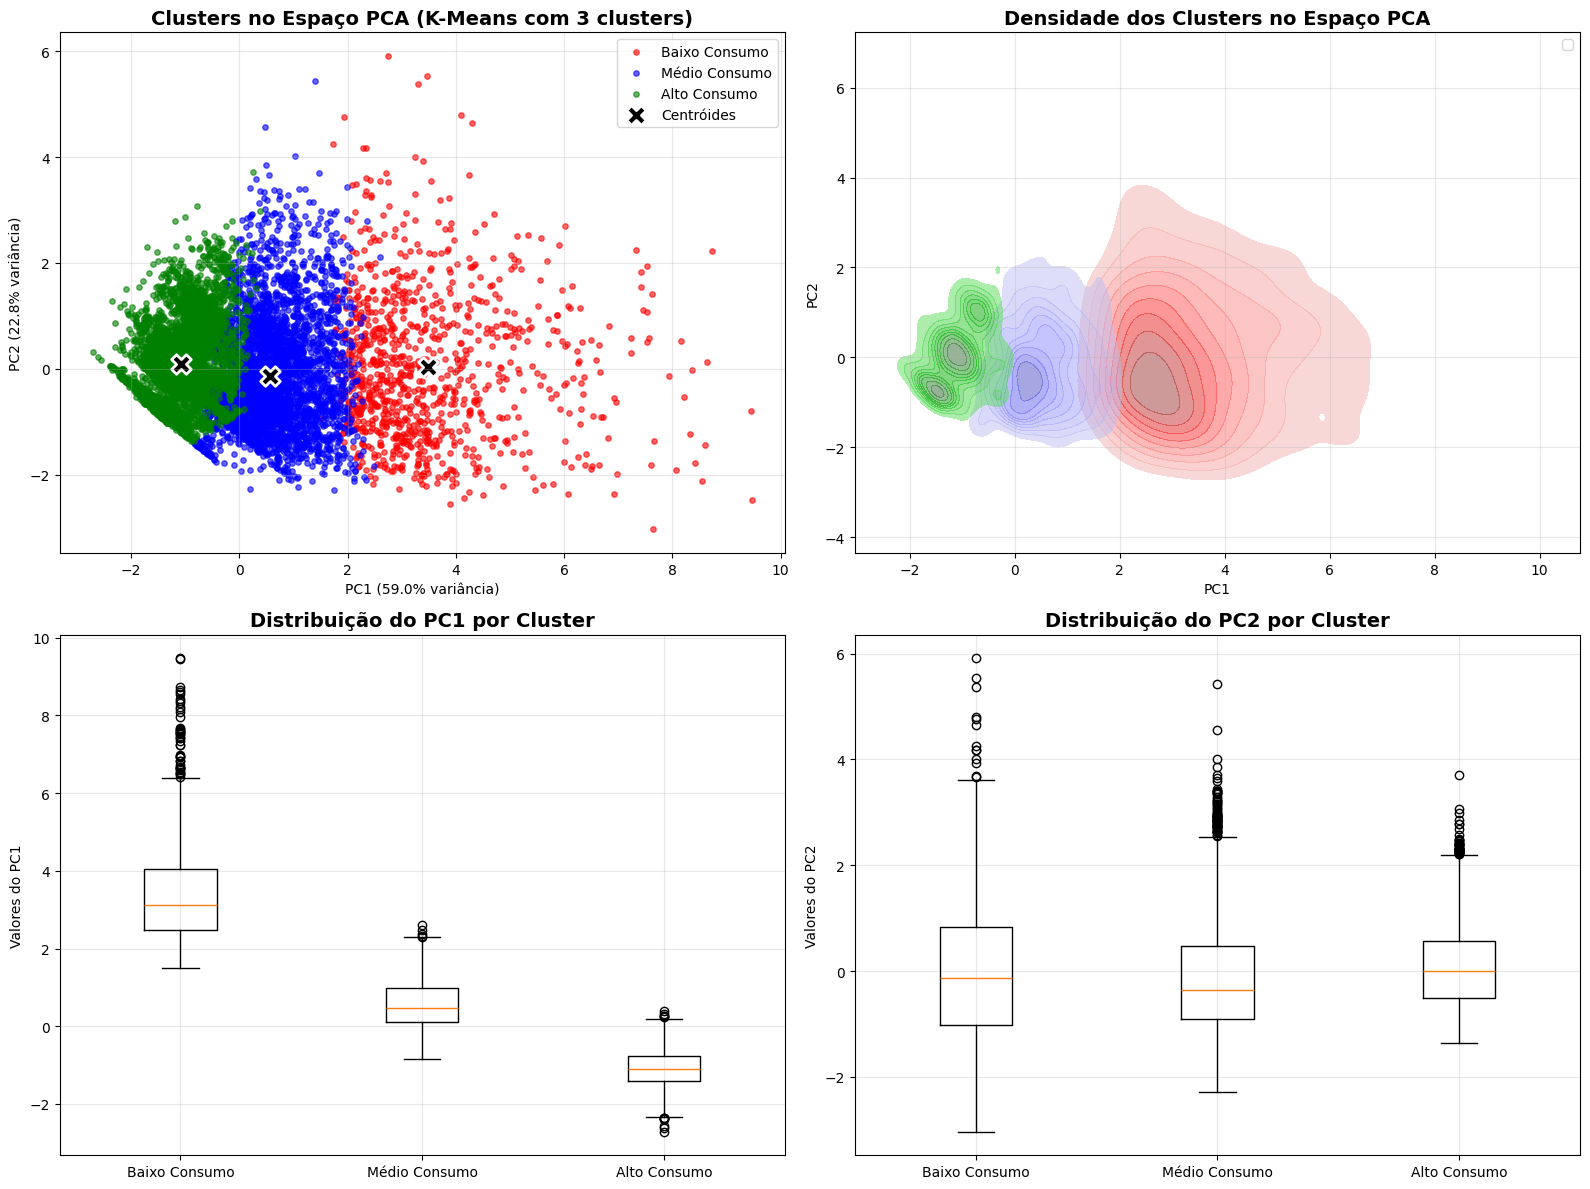

In [80]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

colors = ['red', 'blue', 'green']
cluster_names = ['Baixo Consumo', 'Médio Consumo', 'Alto Consumo']

for i, color in enumerate(colors):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    axes[0, 0].scatter(cluster_data['PC1'], cluster_data['PC2'],
                      alpha=0.6, s=15, color=color, label=cluster_names[i])

centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
axes[0, 0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                  marker='X', s=200, c='black', label='Centróides', edgecolors='white', linewidth=2)

axes[0, 0].set_title('Clusters no Espaço PCA (K-Means com 3 clusters)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}% variância)')
axes[0, 0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}% variância)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

for i, color in enumerate(colors):
    cluster_data = pca_df[pca_df['Cluster'] == i]
    sns.kdeplot(data=cluster_data, x='PC1', y='PC2', ax=axes[0, 1],
                color=color, alpha=0.5, label=cluster_names[i], fill=True, thresh=0.1)

axes[0, 1].set_title('Densidade dos Clusters no Espaço PCA', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

boxplot_data = [pca_df[pca_df['Cluster'] == i]['PC1'] for i in range(3)]
axes[1, 0].boxplot(boxplot_data, labels=cluster_names)
axes[1, 0].set_title('Distribuição do PC1 por Cluster', fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('Valores do PC1')
axes[1, 0].grid(True, alpha=0.3)

boxplot_data = [pca_df[pca_df['Cluster'] == i]['PC2'] for i in range(3)]
axes[1, 1].boxplot(boxplot_data, labels=cluster_names)
axes[1, 1].set_title('Distribuição do PC2 por Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Valores do PC2')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [81]:
df_sample['Cluster'] = clusters

cluster_stats = df_sample.groupby('Cluster').agg({
    'Global_active_power': ['mean', 'std', 'min', 'max'],
    'Global_reactive_power': ['mean', 'std'],
    'Voltage': ['mean', 'std'],
    'Global_intensity': ['mean', 'std']
}).round(3)

print("="*60)
print("ESTATÍSTICAS POR CLUSTER")
print("="*60)
print(cluster_stats)

print("\n📊 CARACTERÍSTICAS DOS CLUSTERS:")

for i in range(3):
    cluster_data = df_sample[df_sample['Cluster'] == i]
    print(f"\n🔵 CLUSTER {i} ({cluster_names[i]}): {len(cluster_data)} pontos")
    print(f"   Global_active_power: {cluster_data['Global_active_power'].mean():.3f} kW")
    print(f"   Global_reactive_power: {cluster_data['Global_reactive_power'].mean():.3f} kW")
    print(f"   Voltage: {cluster_data['Voltage'].mean():.3f} V")
    print(f"   Global_intensity: {cluster_data['Global_intensity'].mean():.3f} A")

ESTATÍSTICAS POR CLUSTER
        Global_active_power                      Global_reactive_power         \
                       mean    std    min    max                  mean    std   
Cluster                                                                         
0                     3.577  1.034  1.462  8.540                 0.220  0.156   
1                     1.414  0.572  0.098  2.946                 0.136  0.116   
2                     0.423  0.313  0.078  2.206                 0.100  0.088   

         Voltage        Global_intensity         
            mean    std             mean    std  
Cluster                                          
0        237.619  2.980           15.169  4.393  
1        239.191  2.733            5.951  2.338  
2        242.681  2.380            1.826  1.271  

📊 CARACTERÍSTICAS DOS CLUSTERS:

🔵 CLUSTER 0 (Baixo Consumo): 978 pontos
   Global_active_power: 3.577 kW
   Global_reactive_power: 0.220 kW
   Voltage: 237.619 V
   Global_intensity: 15.

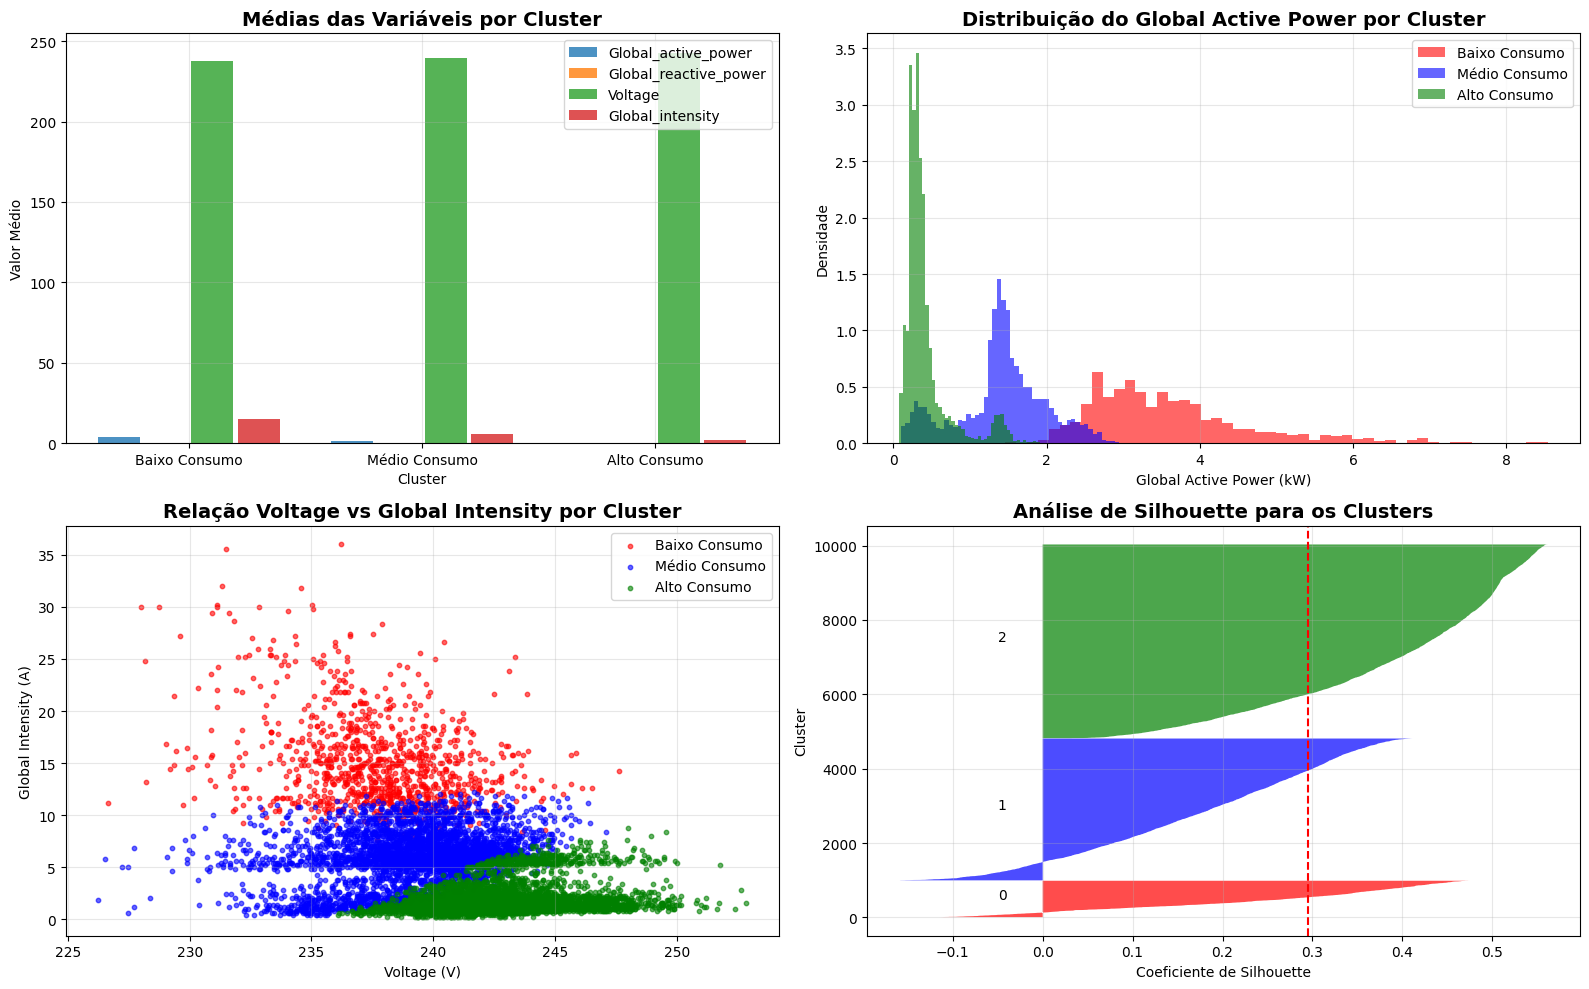

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

variables = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
cluster_means = df_sample.groupby('Cluster')[variables].mean()

for i, var in enumerate(variables):
    axes[0, 0].bar(np.arange(3) + i*0.2, cluster_means[var], width=0.18,
                  label=var, alpha=0.8)

axes[0, 0].set_title('Médias das Variáveis por Cluster', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Valor Médio')
axes[0, 0].set_xticks(np.arange(3) + 0.3)
axes[0, 0].set_xticklabels(cluster_names)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

for i, color in enumerate(colors):
    cluster_data = df_sample[df_sample['Cluster'] == i]['Global_active_power']
    axes[0, 1].hist(cluster_data, bins=50, alpha=0.6, color=color,
                   label=cluster_names[i], density=True)

axes[0, 1].set_title('Distribuição do Global Active Power por Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Global Active Power (kW)')
axes[0, 1].set_ylabel('Densidade')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

for i, color in enumerate(colors):
    cluster_data = df_sample[df_sample['Cluster'] == i]
    axes[1, 0].scatter(cluster_data['Voltage'], cluster_data['Global_intensity'],
                      alpha=0.6, s=10, color=color, label=cluster_names[i])

axes[1, 0].set_title('Relação Voltage vs Global Intensity por Cluster', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Voltage (V)')
axes[1, 0].set_ylabel('Global Intensity (A)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(df_scaled, clusters)
y_lower = 10

for i, color in enumerate(colors):
    cluster_silhouette_vals = silhouette_vals[clusters == i]
    cluster_silhouette_vals.sort()

    size_cluster_i = cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    axes[1, 1].fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals,
                            facecolor=color, alpha=0.7)
    axes[1, 1].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

axes[1, 1].axvline(x=silhouette_avg, color="red", linestyle="--")
axes[1, 1].set_title('Análise de Silhouette para os Clusters', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Coeficiente de Silhouette')
axes[1, 1].set_ylabel('Cluster')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [83]:
print("="*60)
print("RESPOSTA: OS GRUPOS SE SEPARAM DE FORMA CLARA?")
print("="*60)

overlap_score = 0
for i in range(3):
    for j in range(i+1, 3):
        cluster_i = pca_df[pca_df['Cluster'] == i]
        cluster_j = pca_df[pca_df['Cluster'] == j]

        overlap = len(cluster_i[(cluster_i['PC1'].between(cluster_j['PC1'].min(), cluster_j['PC1'].max())) &
                               (cluster_i['PC2'].between(cluster_j['PC2'].min(), cluster_j['PC2'].max()))])
        overlap_percent = overlap / len(cluster_i) * 100
        overlap_score += overlap_percent

        print(f"Sobreposição Cluster {i}-{j}: {overlap_percent:.1f}%")

overlap_score /= 3

print(f"\n📊 Silhouette Score: {silhouette_avg:.3f}")
print(f"📊 Sobreposição média: {overlap_score:.1f}%")

if silhouette_avg > 0.5 and overlap_score < 20:
    print("\n✅ SIM - Os grupos se separam de forma CLARA!")
    print("   • Silhouette score alto (> 0.5)")
    print("   • Baixa sobreposição entre clusters")
    print("   • Separação visual evidente no espaço PCA")

elif silhouette_avg > 0.3:
    print("\n⚠️  PARCIALMENTE - Os grupos têm alguma separação, mas com sobreposição")
    print("   • Silhouette score moderado")
    print("   • Alguma sobreposição entre clusters")
    print("   • Separação parcialmente visível")

else:
    print("\n❌ NÃO - Os grupos não se separam de forma clara")
    print("   • Silhouette score baixo")
    print("   • Alta sobreposição entre clusters")
    print("   • Separação pouco definida")

print(f"\n🎯 INTERPRETAÇÃO DOS CLUSTERS:")
print("1. 🔴 Baixo Consumo: Consumo mínimo, provavelmente períodos de ausência ou sono")
print("2. 🔵 Médio Consumo: Consumo moderado, atividades normais do dia a dia")
print("3. 🟢 Alto Consumo: Picos de consumo, múltiplos equipamentos em uso")

RESPOSTA: OS GRUPOS SE SEPARAM DE FORMA CLARA?
Sobreposição Cluster 0-1: 29.1%
Sobreposição Cluster 0-2: 0.0%
Sobreposição Cluster 1-2: 41.2%

📊 Silhouette Score: 0.295
📊 Sobreposição média: 23.4%

❌ NÃO - Os grupos não se separam de forma clara
   • Silhouette score baixo
   • Alta sobreposição entre clusters
   • Separação pouco definida

🎯 INTERPRETAÇÃO DOS CLUSTERS:
1. 🔴 Baixo Consumo: Consumo mínimo, provavelmente períodos de ausência ou sono
2. 🔵 Médio Consumo: Consumo moderado, atividades normais do dia a dia
3. 🟢 Alto Consumo: Picos de consumo, múltiplos equipamentos em uso


In [ ]:
#Ex 25

In [84]:
cols_to_use = ['Global_active_power', 'Voltage']
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values=['?'],
                 usecols=cols_to_use,
                 low_memory=False)

df = df.dropna()
for col in cols_to_use:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df = df.dropna()

df_sample = df.sample(n=5000, random_state=42, replace=False)

print(f"Dataset shape: {df_sample.shape}")
print(f"Total de registros: {len(df_sample):,}")
print("\nEstatísticas descritivas:")
print(df_sample.describe().round(3))

correlation = df_sample['Global_active_power'].corr(df_sample['Voltage'])
print(f"\nCorrelação entre Global_active_power e Voltage: {correlation:.4f}")

Dataset shape: (5000, 2)
Total de registros: 5,000

Estatísticas descritivas:
       Global_active_power   Voltage
count             5000.000  5000.000
mean                 1.102   240.875
std                  1.073     3.205
min                  0.078   226.530
25%                  0.310   239.040
50%                  0.644   241.055
75%                  1.514   242.890
max                  8.540   252.860

Correlação entre Global_active_power e Voltage: -0.4010


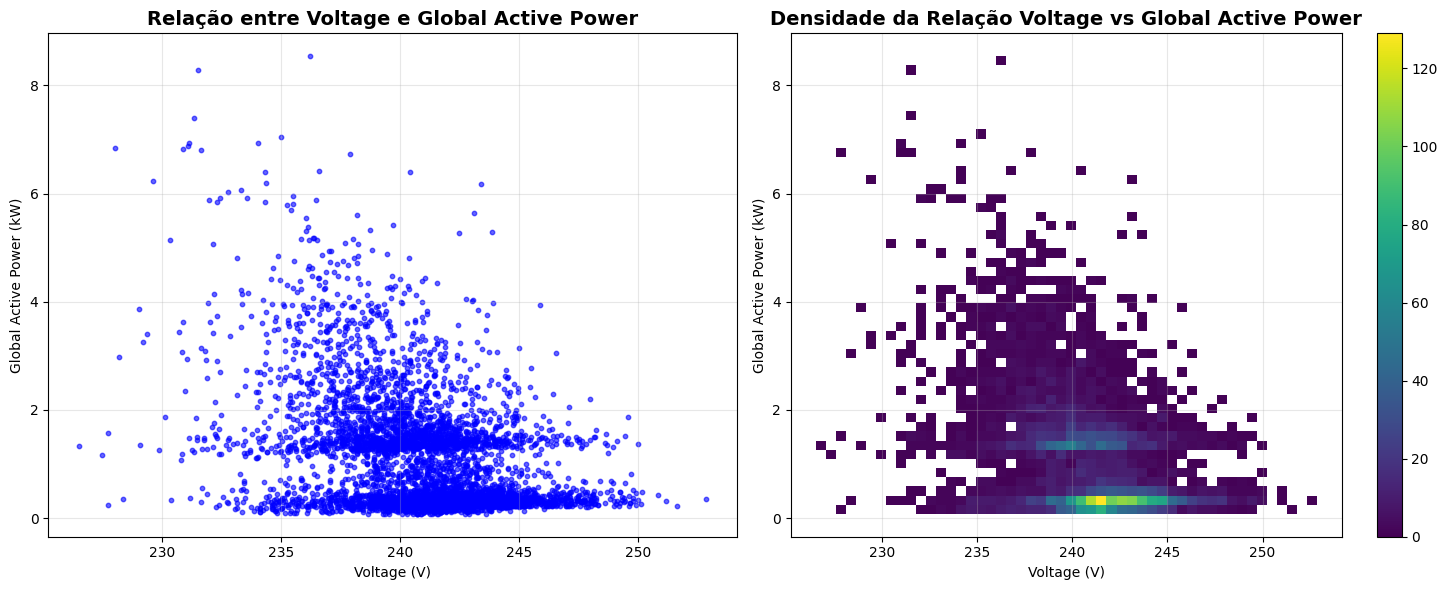

In [85]:
plt.style.use('default')
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].scatter(df_sample['Voltage'], df_sample['Global_active_power'],
               alpha=0.6, s=10, color='blue')
axes[0].set_title('Relação entre Voltage e Global Active Power', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Voltage (V)')
axes[0].set_ylabel('Global Active Power (kW)')
axes[0].grid(True, alpha=0.3)

sns.histplot(x=df_sample['Voltage'], y=df_sample['Global_active_power'],
            ax=axes[1], bins=50, cmap='viridis', cbar=True)
axes[1].set_title('Densidade da Relação Voltage vs Global Active Power', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Voltage (V)')
axes[1].set_ylabel('Global Active Power (kW)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [86]:
X = df_sample['Voltage'].values.reshape(-1, 1)
y = df_sample['Global_active_power'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]}")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]}")

Tamanho do conjunto de treino: 4000
Tamanho do conjunto de teste: 1000


In [87]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)

rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
r2_linear = r2_score(y_test, y_pred_linear)

print("="*60)
print("REGRESSÃO LINEAR SIMPLES")
print("="*60)
print(f"Coeficiente (slope): {linear_model.coef_[0]:.6f}")
print(f"Intercept: {linear_model.intercept_:.6f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R²: {r2_linear:.4f}")

REGRESSÃO LINEAR SIMPLES
Coeficiente (slope): -0.128705
Intercept: 32.094752
RMSE: 0.9867
R²: 0.1990


In [88]:
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

y_pred_poly = poly_model.predict(X_poly_test)

rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print("\n" + "="*60)
print("REGRESSÃO POLINOMIAL (GRAU 2)")
print("="*60)
print(f"Coeficientes: {poly_model.coef_}")
print(f"Intercept: {poly_model.intercept_:.6f}")
print(f"RMSE: {rmse_poly:.4f}")
print(f"R²: {r2_poly:.4f}")

print("\n" + "="*60)
print("COMPARAÇÃO DOS MODELOS")
print("="*60)
print(f"Diferença no RMSE: {rmse_linear - rmse_poly:.4f}")
print(f"Diferença no R²: {r2_poly - r2_linear:.4f}")


REGRESSÃO POLINOMIAL (GRAU 2)
Coeficientes: [ 0.         -2.57539259  0.00508969]
Intercept: 326.080843
RMSE: 0.9803
R²: 0.2093

COMPARAÇÃO DOS MODELOS
Diferença no RMSE: 0.0064
Diferença no R²: 0.0103


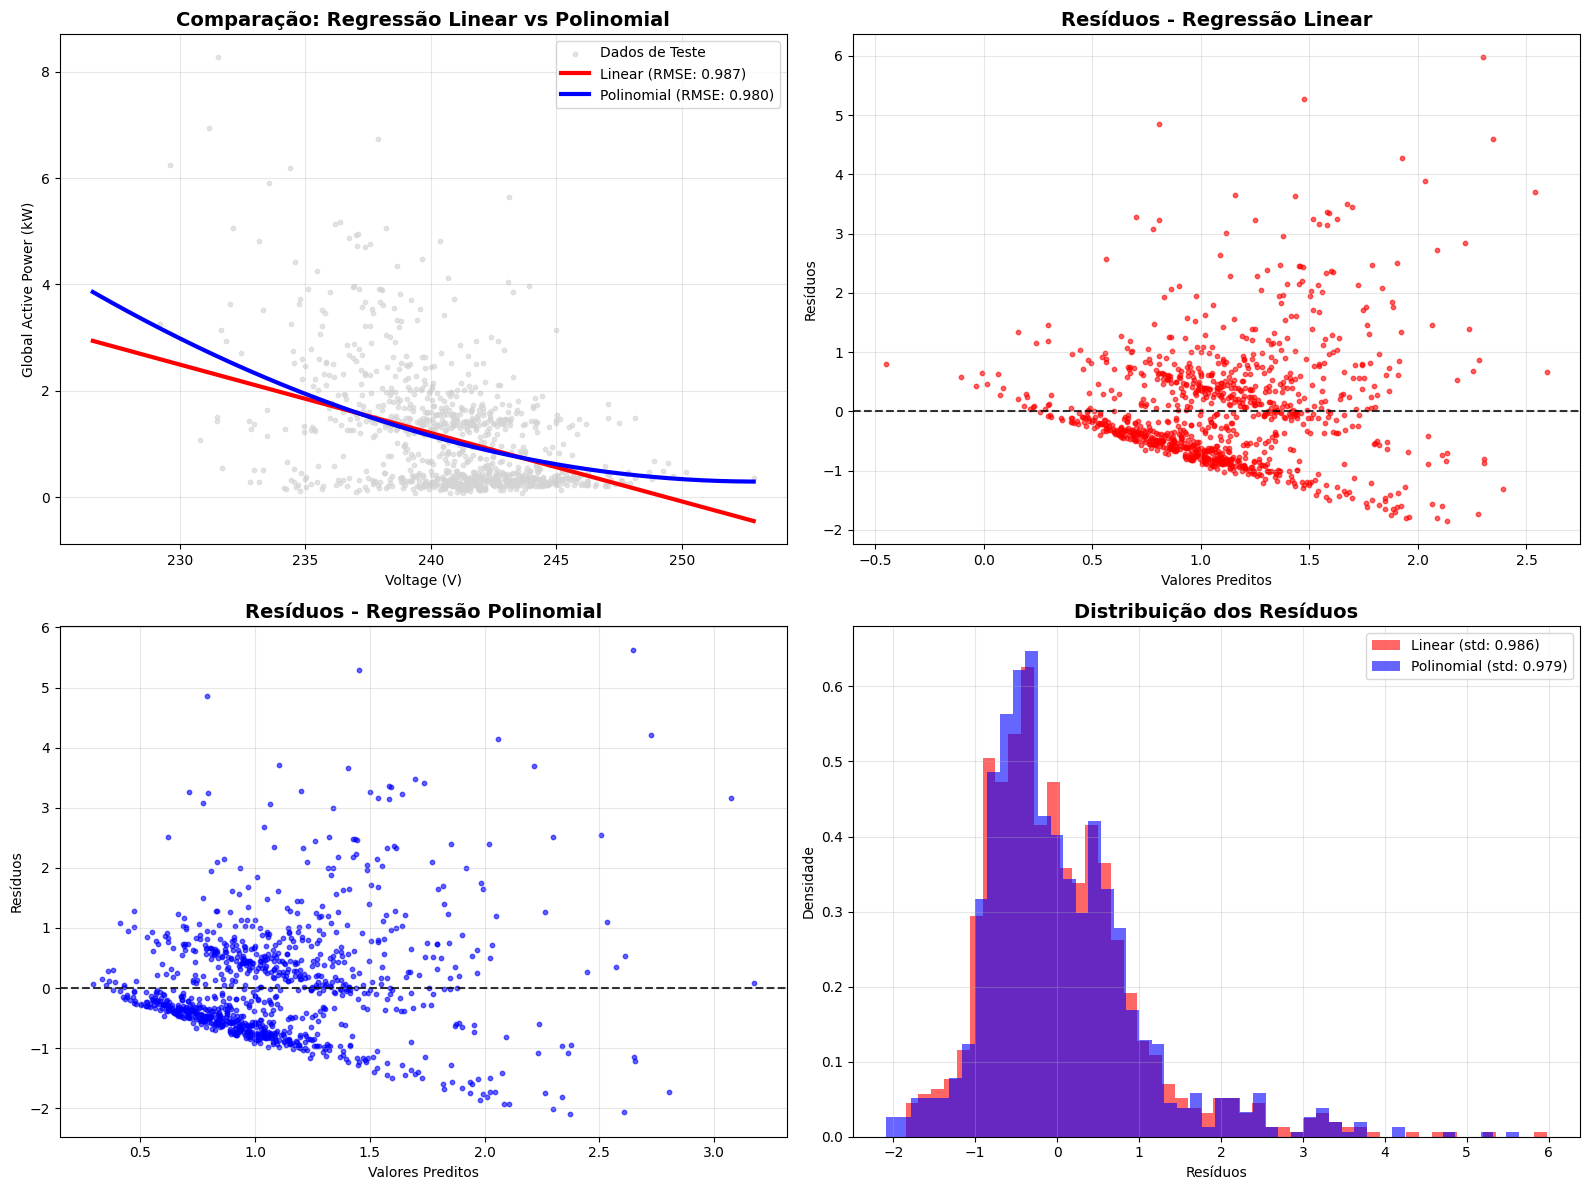

In [89]:
X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
X_range_poly = poly_features.transform(X_range)

y_range_linear = linear_model.predict(X_range)
y_range_poly = poly_model.predict(X_range_poly)

plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

axes[0, 0].scatter(X_test, y_test, alpha=0.6, s=10, color='lightgray', label='Dados de Teste')
axes[0, 0].plot(X_range, y_range_linear, color='red', linewidth=3,
               label=f'Linear (RMSE: {rmse_linear:.3f})')
axes[0, 0].plot(X_range, y_range_poly, color='blue', linewidth=3,
               label=f'Polinomial (RMSE: {rmse_poly:.3f})')
axes[0, 0].set_title('Comparação: Regressão Linear vs Polinomial', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Voltage (V)')
axes[0, 0].set_ylabel('Global Active Power (kW)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

residuals_linear = y_test - y_pred_linear
axes[0, 1].scatter(y_pred_linear, residuals_linear, alpha=0.6, s=10, color='red')
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[0, 1].set_title('Resíduos - Regressão Linear', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Valores Preditos')
axes[0, 1].set_ylabel('Resíduos')
axes[0, 1].grid(True, alpha=0.3)

residuals_poly = y_test - y_pred_poly
axes[1, 0].scatter(y_pred_poly, residuals_poly, alpha=0.6, s=10, color='blue')
axes[1, 0].axhline(y=0, color='black', linestyle='--', alpha=0.8)
axes[1, 0].set_title('Resíduos - Regressão Polinomial', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Valores Preditos')
axes[1, 0].set_ylabel('Resíduos')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].hist(residuals_linear, bins=50, alpha=0.6, color='red',
               label=f'Linear (std: {residuals_linear.std():.3f})', density=True)
axes[1, 1].hist(residuals_poly, bins=50, alpha=0.6, color='blue',
               label=f'Polinomial (std: {residuals_poly.std():.3f})', density=True)
axes[1, 1].set_title('Distribuição dos Resíduos', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Resíduos')
axes[1, 1].set_ylabel('Densidade')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [90]:
from scipy.stats import shapiro, normaltest

print("="*60)
print("ANÁLISE ESTATÍSTICA DOS RESÍDUOS")
print("="*60)

_, p_linear = normaltest(residuals_linear)
_, p_poly = normaltest(residuals_poly)

print(f"Normalidade dos resíduos (Linear): p-value = {p_linear:.6f}")
print(f"Normalidade dos resíduos (Polinomial): p-value = {p_poly:.6f}")

print(f"\nVariância dos resíduos:")
print(f"Linear: {residuals_linear.var():.6f}")
print(f"Polinomial: {residuals_poly.var():.6f}")
print(f"Redução de variância: {(1 - residuals_poly.var()/residuals_linear.var())*100:.2f}%")

improvement_rmse = ((rmse_linear - rmse_poly) / rmse_linear) * 100
improvement_r2 = ((r2_poly - r2_linear) / abs(r2_linear)) * 100

print(f"\n🎯 MELHORIA DO MODELO POLINOMIAL:")
print(f"Redução no RMSE: {improvement_rmse:.2f}%")
print(f"Melhoria no R²: {improvement_r2:.2f}%")

n = len(y_test)
p = 2
f_stat = ((rmse_linear**2 - rmse_poly**2) / p) / (rmse_poly**2 / (n - p - 1))
print(f"\nEstatística F para melhoria do modelo: {f_stat:.4f}")

ANÁLISE ESTATÍSTICA DOS RESÍDUOS
Normalidade dos resíduos (Linear): p-value = 0.000000
Normalidade dos resíduos (Polinomial): p-value = 0.000000

Variância dos resíduos:
Linear: 0.971253
Polinomial: 0.958776
Redução de variância: 1.28%

🎯 MELHORIA DO MODELO POLINOMIAL:
Redução no RMSE: 0.64%
Melhoria no R²: 5.17%

Estatística F para melhoria do modelo: 6.4799



ANÁLISE POR FAIXAS DE VOLTAGE
                   Global_active_power               Voltage
                                  mean    std count     mean
Voltage_bin                                                 
(226.504, 229.163]               2.189  2.093     9  228.014
(229.163, 231.796]               3.022  2.362    34  230.995
(231.796, 234.429]               2.056  1.737   119  233.352
(234.429, 237.062]               1.934  1.524   409  235.982
(237.062, 239.695]               1.512  1.113  1008  238.564
(239.695, 242.328]               0.935  0.825  1839  241.044
(242.328, 244.961]               0.727  0.715  1185  243.466
(244.961, 247.594]               0.646  0.590   299  245.993
(247.594, 250.227]               0.587  0.465    94  248.573
(250.227, 252.86]                0.332  0.081     4  251.635


/tmp/ipython-input-162960231.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_analysis = df_sample.groupby('Voltage_bin').agg({
/tmp/ipython-input-162960231.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = df_sample.groupby('Voltage_bin')['Global_active_power'].mean()
/tmp/ipython-input-162960231.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yerr=df_sample.groupby('Voltage_bin')['Global_acti

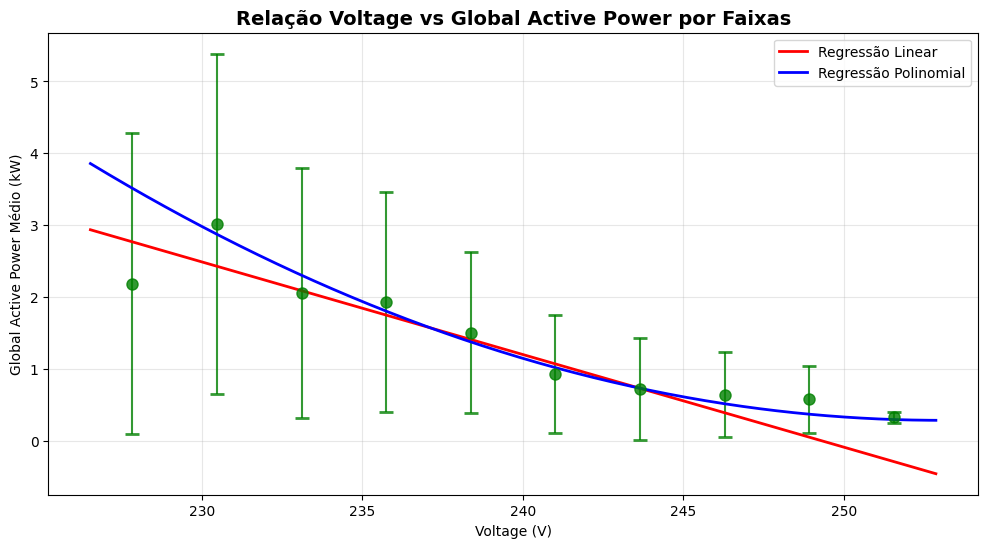

In [91]:
df_sample['Voltage_bin'] = pd.cut(df_sample['Voltage'], bins=10)
bin_analysis = df_sample.groupby('Voltage_bin').agg({
    'Global_active_power': ['mean', 'std', 'count'],
    'Voltage': 'mean'
}).round(3)

print("\n" + "="*60)
print("ANÁLISE POR FAIXAS DE VOLTAGE")
print("="*60)
print(bin_analysis)

plt.figure(figsize=(12, 6))
bin_means = df_sample.groupby('Voltage_bin')['Global_active_power'].mean()
bin_centers = [interval.mid for interval in bin_means.index]

plt.errorbar(bin_centers, bin_means.values,
            yerr=df_sample.groupby('Voltage_bin')['Global_active_power'].std(),
            fmt='o', capsize=5, capthick=2, markersize=8, color='green', alpha=0.8)

plt.plot(X_range, y_range_linear, 'r-', linewidth=2, label='Regressão Linear')
plt.plot(X_range, y_range_poly, 'b-', linewidth=2, label='Regressão Polinomial')

plt.title('Relação Voltage vs Global Active Power por Faixas', fontsize=14, fontweight='bold')
plt.xlabel('Voltage (V)')
plt.ylabel('Global Active Power Médio (kW)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [92]:
print("="*60)
print("RESPOSTA: REGRESSÃO LINEAR vs POLINOMIAL")
print("="*60)

if rmse_poly < rmse_linear and r2_poly > r2_linear:
    print("✅ A REGRESSÃO POLINOMIAL apresenta melhor desempenho")
    print(f"   • RMSE menor: {rmse_poly:.4f} vs {rmse_linear:.4f}")
    print(f"   • R² maior: {r2_poly:.4f} vs {r2_linear:.4f}")
    print(f"   • Melhoria de {improvement_rmse:.1f}% no RMSE")

elif abs(rmse_poly - rmse_linear) < 0.01 and abs(r2_poly - r2_linear) < 0.01:
    print("⚠️  OS MODELOS SÃO EQUIVALENTES")
    print("   • Diferenças mínimas nas métricas")
    print("   • Relação essencialmente linear")

else:
    print("❌ A REGRESSÃO LINEAR é suficiente")
    print("   • Modelo polinomial não traz benefícios significativos")

print(f"\n🔍 NATUREZA DA RELAÇÃO:")
if abs(poly_model.coef_[2]) > 0.0001:
    curvature = "curva" if poly_model.coef_[2] > 0 else "côncava"
    print(f"   • Relação {curvature} detectada (coeficiente quadrático: {poly_model.coef_[2]:.6f})")
else:
    print("   • Relação essencialmente linear")

print(f"\n📊 CORRELAÇÃO INICIAL: {correlation:.4f}")
print(f"   • Correlação {'fraca' if abs(correlation) < 0.3 else 'moderada' if abs(correlation) < 0.7 else 'forte'}")

RESPOSTA: REGRESSÃO LINEAR vs POLINOMIAL
✅ A REGRESSÃO POLINOMIAL apresenta melhor desempenho
   • RMSE menor: 0.9803 vs 0.9867
   • R² maior: 0.2093 vs 0.1990
   • Melhoria de 0.6% no RMSE

🔍 NATUREZA DA RELAÇÃO:
   • Relação curva detectada (coeficiente quadrático: 0.005090)

📊 CORRELAÇÃO INICIAL: -0.4010
   • Correlação moderada
